In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os

from sklearn import cross_validation
from sklearn import neighbors
from sklearn import grid_search
from sklearn import metrics
from sklearn import linear_model

% matplotlib inline

In [9]:
# Could add in a routine here that checks if the test & train files already exist and if so, ignore the set generation
# and instead load in the files and initialise the dataframes
dataset = pd.read_csv("MasterFileDF.csv")
dataset.head()

,standup_chair,sitdown_chair,comb_hair,walk,descend_stairs,drink_glass,eat_meat,eat_soup,pour_water,liedown_bed,getup_bed,use_telephone,brush_teeth
0,Accelerometer-2011-03-23-10-39-18-standup_chai...,Accelerometer-2011-03-24-09-50-16-sitdown_chai...,Accelerometer-2011-03-24-09-44-34-comb_hair-f1...,Accelerometer-2011-03-24-09-51-07-walk-f1.txt,Accelerometer-2011-03-24-10-24-02-descend_stai...,Accelerometer-2011-03-24-10-07-02-drink_glass-...,Accelerometer-2011-03-24-13-06-15-eat_meat-f1.txt,Accelerometer-2011-03-24-13-33-22-eat_soup-f1.txt,Accelerometer-2011-03-24-10-04-32-pour_water-f...,Accelerometer-2011-03-29-09-19-22-liedown_bed-...,Accelerometer-2011-03-29-09-21-17-getup_bed-f1...,Accelerometer-2011-03-29-09-30-56-use_telephon...,Accelerometer-2011-04-11-13-28-18-brush_teeth-...
1,Accelerometer-2011-03-23-10-42-01-standup_chai...,Accelerometer-2011-03-24-10-27-33-sitdown_chai...,Accelerometer-2011-03-24-10-26-33-comb_hair-f1...,Accelerometer-2011-03-24-09-52-11-walk-f1.txt,Accelerometer-2011-03-24-10-25-11-descend_stai...,Accelerometer-2011-03-24-10-16-02-drink_glass-...,Accelerometer-2011-03-24-13-10-14-eat_meat-f1.txt,Accelerometer-2011-03-24-13-44-18-eat_soup-f1.txt,Accelerometer-2011-03-24-10-51-12-pour_water-f...,Accelerometer-2011-03-29-09-23-22-liedown_bed-...,Accelerometer-2011-03-29-09-24-50-getup_bed-f1...,Accelerometer-2011-03-29-09-32-59-use_telephon...,Accelerometer-2011-04-11-13-29-54-brush_teeth-...
2,Accelerometer-2011-03-23-10-45-51-standup_chai...,Accelerometer-2011-03-24-16-09-29-sitdown_chai...,Accelerometer-2011-03-24-10-57-40-comb_hair-f1...,Accelerometer-2011-03-24-10-58-34-walk-f1.txt,Accelerometer-2011-03-24-11-20-43-descend_stai...,Accelerometer-2011-03-24-10-46-25-drink_glass-...,Accelerometer-2011-03-24-13-12-52-eat_meat-f1.txt,Accelerometer-2011-03-24-13-56-42-eat_soup-f1.txt,Accelerometer-2011-03-24-13-30-01-pour_water-f...,Accelerometer-2011-03-29-09-45-46-liedown_bed-...,Accelerometer-2011-03-29-09-49-03-getup_bed-f1...,Accelerometer-2011-03-29-09-52-41-use_telephon...,Accelerometer-2011-05-30-08-35-11-brush_teeth-...
3,Accelerometer-2011-03-23-10-47-59-standup_chai...,Accelerometer-2011-03-29-09-06-48-sitdown_chai...,Accelerometer-2011-03-24-16-10-36-comb_hair-f2...,Accelerometer-2011-03-24-11-20-24-walk-f1.txt,Accelerometer-2011-03-29-09-15-58-descend_stai...,Accelerometer-2011-03-24-11-14-00-drink_glass-...,Accelerometer-2011-03-24-13-17-42-eat_meat-f1.txt,NaN,Accelerometer-2011-04-05-18-54-14-pour_water-f...,Accelerometer-2011-04-05-18-27-12-liedown_bed-...,Accelerometer-2011-04-05-18-28-21-getup_bed-f1...,Accelerometer-2011-04-05-18-29-19-use_telephon...,Accelerometer-2011-05-30-09-36-50-brush_teeth-...
4,Accelerometer-2011-03-24-09-49-36-standup_chai...,Accelerometer-2011-03-29-09-12-27-sitdown_chai...,Accelerometer-2011-03-29-08-57-24-comb_hair-f1...,Accelerometer-2011-03-24-11-21-13-walk-f1.txt,Accelerometer-2011-03-29-16-16-34-descend_stai...,Accelerometer-2011-03-24-13-09-29-drink_glass-...,Accelerometer-2011-03-24-13-21-39-eat_meat-f1.txt,NaN,Accelerometer-2011-04-11-12-55-26-pour_water-f...,Accelerometer-2011-04-11-11-52-20-liedown_bed-...,Accelerometer-2011-04-11-11-53-01-getup_bed-f1...,Accelerometer-2011-04-11-11-53-34-use_telephon...,Accelerometer-2011-05-30-10-34-16-brush_teeth-...


In [10]:
# Based upon previous review during exploratory data analysis, drop the 'eat_meat' & 'eat_soup' activities
dataset = dataset.drop(['eat_meat','eat_soup'],axis=1)
dataset.head()

,standup_chair,sitdown_chair,comb_hair,walk,descend_stairs,drink_glass,pour_water,liedown_bed,getup_bed,use_telephone,brush_teeth
0,Accelerometer-2011-03-23-10-39-18-standup_chai...,Accelerometer-2011-03-24-09-50-16-sitdown_chai...,Accelerometer-2011-03-24-09-44-34-comb_hair-f1...,Accelerometer-2011-03-24-09-51-07-walk-f1.txt,Accelerometer-2011-03-24-10-24-02-descend_stai...,Accelerometer-2011-03-24-10-07-02-drink_glass-...,Accelerometer-2011-03-24-10-04-32-pour_water-f...,Accelerometer-2011-03-29-09-19-22-liedown_bed-...,Accelerometer-2011-03-29-09-21-17-getup_bed-f1...,Accelerometer-2011-03-29-09-30-56-use_telephon...,Accelerometer-2011-04-11-13-28-18-brush_teeth-...
1,Accelerometer-2011-03-23-10-42-01-standup_chai...,Accelerometer-2011-03-24-10-27-33-sitdown_chai...,Accelerometer-2011-03-24-10-26-33-comb_hair-f1...,Accelerometer-2011-03-24-09-52-11-walk-f1.txt,Accelerometer-2011-03-24-10-25-11-descend_stai...,Accelerometer-2011-03-24-10-16-02-drink_glass-...,Accelerometer-2011-03-24-10-51-12-pour_water-f...,Accelerometer-2011-03-29-09-23-22-liedown_bed-...,Accelerometer-2011-03-29-09-24-50-getup_bed-f1...,Accelerometer-2011-03-29-09-32-59-use_telephon...,Accelerometer-2011-04-11-13-29-54-brush_teeth-...
2,Accelerometer-2011-03-23-10-45-51-standup_chai...,Accelerometer-2011-03-24-16-09-29-sitdown_chai...,Accelerometer-2011-03-24-10-57-40-comb_hair-f1...,Accelerometer-2011-03-24-10-58-34-walk-f1.txt,Accelerometer-2011-03-24-11-20-43-descend_stai...,Accelerometer-2011-03-24-10-46-25-drink_glass-...,Accelerometer-2011-03-24-13-30-01-pour_water-f...,Accelerometer-2011-03-29-09-45-46-liedown_bed-...,Accelerometer-2011-03-29-09-49-03-getup_bed-f1...,Accelerometer-2011-03-29-09-52-41-use_telephon...,Accelerometer-2011-05-30-08-35-11-brush_teeth-...
3,Accelerometer-2011-03-23-10-47-59-standup_chai...,Accelerometer-2011-03-29-09-06-48-sitdown_chai...,Accelerometer-2011-03-24-16-10-36-comb_hair-f2...,Accelerometer-2011-03-24-11-20-24-walk-f1.txt,Accelerometer-2011-03-29-09-15-58-descend_stai...,Accelerometer-2011-03-24-11-14-00-drink_glass-...,Accelerometer-2011-04-05-18-54-14-pour_water-f...,Accelerometer-2011-04-05-18-27-12-liedown_bed-...,Accelerometer-2011-04-05-18-28-21-getup_bed-f1...,Accelerometer-2011-04-05-18-29-19-use_telephon...,Accelerometer-2011-05-30-09-36-50-brush_teeth-...
4,Accelerometer-2011-03-24-09-49-36-standup_chai...,Accelerometer-2011-03-29-09-12-27-sitdown_chai...,Accelerometer-2011-03-29-08-57-24-comb_hair-f1...,Accelerometer-2011-03-24-11-21-13-walk-f1.txt,Accelerometer-2011-03-29-16-16-34-descend_stai...,Accelerometer-2011-03-24-13-09-29-drink_glass-...,Accelerometer-2011-04-11-12-55-26-pour_water-f...,Accelerometer-2011-04-11-11-52-20-liedown_bed-...,Accelerometer-2011-04-11-11-53-01-getup_bed-f1...,Accelerometer-2011-04-11-11-53-34-use_telephon...,Accelerometer-2011-05-30-10-34-16-brush_teeth-...


In [16]:
# Create a function that outputs a randomised training and test set of data filenames
def genTestList(df,test_per):
    # test_per is percentage (0-1) of dataset to be set aside for testing; This percent will be taken from each activity
    train_list = pd.DataFrame(columns=[df.columns],dtype=object)
    test_list = pd.DataFrame(columns=[df.columns],dtype=object)

    for name in df.columns:
        num_test = int(df[name].count()*test_per)  # rounds down to whole number, can't have fraction of a dataset
        # create a list of random rows to assign to the test set
        ran_list = random.sample(xrange(0,(df[name].count())), num_test)
        for num in range(0,(df[name].count())):
            if num not in ran_list:
                train_list.set_value(num,name,df[name][num])
            else:
                test_list.set_value(num,name,df[name][num])
    train_list.reset_index(drop=True,inplace=True)
    test_list.reset_index(drop=True,inplace=True)
    
    return train_list,test_list

In [17]:
# create a function to re-sort the dataframe so NaNs are at the bottom of each column.  There is no doubt an elegant
# way to do this but the first priority is functional programming

def sortList(df):
    returnList = pd.DataFrame()
    sortList = []
    for name in df.columns:
        for row in df[name]:
            if isinstance(row, basestring):
                sortList.append(row)
        sortList = pd.DataFrame(sortList,columns=[name])
        returnList = pd.concat([returnList,sortList],axis=1)
        sortList = []
        
    return returnList

In [27]:
# Generate list of train and test sets with a test size of 10%.  This test set will be used for final evaluation
master_train_list, master_test_list = genTestList(dataset,0.1)

# Re-sort the training and testing set so NaNs are at the bottom of each column
master_train_list = sortList(master_train_list)
master_test_list = sortList(master_test_list)

# Take the master_train_list and provide a further train/test split of 80/20 which will be used to build & 
# cross validate the model
train_list, test_list = genTestList(master_train_list,0.2)
train_list = sortList(train_list)
test_list = sortList(test_list)

In [29]:
test_list.head()

,standup_chair,sitdown_chair,comb_hair,walk,descend_stairs,drink_glass,pour_water,liedown_bed,getup_bed,use_telephone,brush_teeth
0,Accelerometer-2011-03-29-09-10-24-standup_chai...,Accelerometer-2011-06-01-14-39-48-sitdown_chai...,Accelerometer-2011-03-29-08-57-24-comb_hair-f1...,Accelerometer-2012-06-11-11-37-01-walk-m1.txt,Accelerometer-2011-06-06-10-59-38-descend_stai...,Accelerometer-2011-05-31-16-35-12-drink_glass-...,Accelerometer-2011-06-06-09-50-17-pour_water-f...,Accelerometer-2011-06-02-17-21-57-liedown_bed-...,Accelerometer-2012-06-12-15-34-01-getup_bed-m4...,Accelerometer-2011-05-30-21-00-40-use_telephon...,Accelerometer-2011-05-31-15-16-47-brush_teeth-...
1,Accelerometer-2011-05-30-20-50-30-standup_chai...,Accelerometer-2011-12-05-09-48-48-sitdown_chai...,Accelerometer-2011-05-30-09-39-49-comb_hair-f1...,Accelerometer-2012-05-30-22-03-52-walk-m2.txt,Accelerometer-2011-04-05-18-26-06-descend_stai...,Accelerometer-2011-06-01-14-33-59-drink_glass-...,Accelerometer-2012-05-30-18-26-49-pour_water-f...,Accelerometer-2011-05-31-15-18-50-liedown_bed-...,Accelerometer-2012-06-12-15-34-40-getup_bed-m4...,Accelerometer-2011-03-29-09-30-56-use_telephon...,Accelerometer-2011-04-11-13-29-54-brush_teeth-...
2,Accelerometer-2011-05-30-21-33-37-standup_chai...,Accelerometer-2011-12-11-08-22-36-sitdown_chai...,Accelerometer-2011-05-30-10-36-26-comb_hair-m1...,Accelerometer-2012-06-07-10-52-46-walk-f1.txt,Accelerometer-2011-05-30-09-29-15-descend_stai...,Accelerometer-2011-06-02-17-19-56-drink_glass-...,Accelerometer-2012-06-07-21-32-12-pour_water-f...,Accelerometer-2011-05-30-21-35-19-liedown_bed-...,Accelerometer-2012-06-12-18-44-04-getup_bed-f2...,NaN,NaN
3,Accelerometer-2011-05-31-16-27-45-standup_chai...,Accelerometer-2012-05-25-18-33-29-sitdown_chai...,Accelerometer-2011-06-02-16-18-54-comb_hair-f1...,Accelerometer-2011-05-31-16-23-32-walk-f1.txt,Accelerometer-2011-03-24-11-20-43-descend_stai...,Accelerometer-2011-06-02-17-20-17-drink_glass-...,Accelerometer-2012-06-09-22-56-17-pour_water-m...,Accelerometer-2011-05-31-16-24-36-liedown_bed-...,Accelerometer-2012-06-20-20-27-19-getup_bed-f5...,NaN,NaN
4,Accelerometer-2011-06-01-14-41-32-standup_chai...,Accelerometer-2011-05-30-20-49-32-sitdown_chai...,Accelerometer-2011-06-02-17-03-33-comb_hair-f4...,Accelerometer-2011-03-24-11-20-24-walk-f1.txt,Accelerometer-2011-06-02-10-38-52-descend_stai...,Accelerometer-2011-06-02-17-52-26-drink_glass-...,Accelerometer-2012-05-30-18-27-15-pour_water-f...,Accelerometer-2011-05-30-21-59-16-liedown_bed-...,Accelerometer-2011-03-29-09-24-50-getup_bed-f1...,NaN,NaN


In [150]:
print "Full Data Set Count"
print dataset.count()
print "\nMaster Train" 
print master_train_list.count()
print "\nMaster Test" 
print master_test_list.count()
print "\nTrain Set" 
print train_list.count()
print train_list.count().sum()
print "\nTest Set" 
print test_list.count()

Full Data Set Count
standup_chair     102
sitdown_chair     100
comb_hair          31
walk              100
descend_stairs     42
drink_glass       100
pour_water        100
liedown_bed        28
getup_bed         101
use_telephone      13
brush_teeth        12
dtype: int64

Master Train
standup_chair     92
sitdown_chair     90
comb_hair         28
walk              90
descend_stairs    38
drink_glass       90
pour_water        90
liedown_bed       26
getup_bed         91
use_telephone     12
brush_teeth       11
dtype: int64

Master Test
standup_chair     10
sitdown_chair     10
comb_hair          3
walk              10
descend_stairs     4
drink_glass       10
pour_water        10
liedown_bed        2
getup_bed         10
use_telephone      1
brush_teeth        1
dtype: int64

Train Set
standup_chair     74
sitdown_chair     72
comb_hair         23
walk              72
descend_stairs    31
drink_glass       72
pour_water        72
liedown_bed       21
getup_bed         73
use_teleph

In [31]:
# Output a csv file for each file list dataframe so that there is a record of the files used and the analysis could
# be repeated with the same dataset without having to generate test & train sets each time.
master_train_list.to_csv('Master_Train_List.csv',index = False)
master_test_list.to_csv('Master_Test_List.csv',index = False) 
train_list.to_csv('Train_List.csv',index = False)
test_list.to_csv('Test_List.csv',index = False)

In [32]:
# Define a function that ingests the UCI txt file, and converts each x,y,z stream to 'g' based upon the process
# contained in MANUAL.txt
""""
Acceleration data recorded in the dataset are coded according to the following mapping:
	[0; +63] = [-1.5g; +1.5g]
The conversion rule to extract the real acceleration value from the coded value is the following:
	real_val = -1.5g + (coded_val/63)*3g
"""""
def convertAccel(filepath):
    # open the file
    df = pd.read_csv(filepath,sep=' ',names = ['x','y','z'],header=None)
    # convert each value using equation
    df = df.applymap(lambda x: -1.5 + (x/63.0)*3)
    # output the file as filename-converted.txt
    return df    

In [33]:
# function to creates a list of tuples with format 
# (filename,accelerometer data,activity)

def createTuple(filename):
    filepath = os.getcwd() + '/Data/' + str(filename)  # create full file path to location of file in Data folder
    df = convertAccel(filepath)  # return a 3 column dataframe of the converted x,y,z accelerations
    activity = str(filename).split("-")[7]  # extract the activity name from the filename string
    output = (filename,(df.x,df.y,df.z),activity)
    return output
    

In [34]:
# function that loops through a dataframe of filenames and 
# returns a list of tuples, one tuple for each filename
def createDataList(fileDataframe):
    dataList = []  # initialise a new empty list to fill with tuples
    for ADL in fileDataframe.columns:  # loop through each activity column
        for x in range(0,fileDataframe[ADL].count()): # loop through each filename that is a string (stops at NaN)
            summary = createTuple(fileDataframe[ADL][x])  # create the filename summary tuple
            dataList.append(summary)
    return dataList

In [37]:
finalTestList = createDataList(master_test_list)
trainList = createDataList(train_list)
testList = createDataList(test_list) 

In [40]:
def rms(x):   # function to calculate the root mean square
    return np.sqrt(x.dot(x)/x.size) 

In [90]:
# function to create all the model features; loop through each tuple in list

def createFeatures(activityTuple):
    
    features = pd.DataFrame(index = range(0,len(activityTuple)),columns = ['x_max','y_max','z_max','tot_max','x_min',\
                                                                           'y_min','z_min','tot_min','x_mean','y_mean'\
                                                                           ,'z_mean','tot_mean','x_rms','y_rms','z_rms'\
                                                                           ,'tot_rms','totTime','activity'])
    for row in range(0,len(activityTuple)):
        x,y,z = activityTuple[row][1]
        activity = activityTuple[row][2]
        totAccel = (x**2 + y**2 + z**2)**0.5
        features['x_max'][row] = float(np.max(x))
        features['y_max'][row] = np.max(y)
        features['z_max'][row] = np.max(z)
        features['tot_max'][row] = np.max(totAccel)
        features['x_min'][row] = np.min(x)
        features['y_min'][row] = np.min(y)
        features['z_min'][row] = np.min(z)
        features['tot_min'][row] = np.min(totAccel)
        features['x_mean'][row] = np.mean(x)
        features['y_mean'][row] = np.mean(y)
        features['z_mean'][row] = np.mean(z)
        features['tot_mean'][row] = np.mean(totAccel)
        features['x_rms'][row] = rms(x)
        features['y_rms'][row] = rms(y)
        features['z_rms'][row] = rms(z)
        features['tot_rms'][row] = rms(totAccel)
        features['totTime'][row] = len(x)*(1/32.0)  # The activity length in seconds is no. samples * 1/sampling rate
        features['activity'][row] = str(activity)
        
    return features

In [151]:
finalTestFeaturesDF = createFeatures(finalTestList)
trainFeaturesDF = createFeatures(trainList)
testFeaturesDF = createFeatures(testList)

In [153]:
# The features dataframe has been initialised as all objects whereas all
# columns other than activity should be float.  Convert to correct data type
# so can create plots in exploratory analysis
col_names = finalTestFeaturesDF.columns
col_names = col_names[0:(len(col_names)-1)]  # drop activity from col_names
finalTestFeaturesDF[col_names] = finalTestFeaturesDF[col_names].astype(float)
finalTestFeaturesDF.activity = finalTestFeaturesDF.activity.astype(str)
trainFeaturesDF[col_names] = trainFeaturesDF[col_names].astype(float)
trainFeaturesDF.activity = trainFeaturesDF.activity.astype(str)
testFeaturesDF[col_names] = testFeaturesDF[col_names].astype(float)
testFeaturesDF.activity = testFeaturesDF.activity.astype(str)

In [154]:
def pre_proc(df):
    # Create dummy variables for all non-numerical columns
    # Get dummy variables for Activity
    df = df.join(pd.get_dummies(df['activity'], prefix='is'))
    # Remove Sex column
    df = df.drop(['activity'], axis=1)
    return df

In [155]:
trainFeaturesDF = pre_proc(trainFeaturesDF)
testFeaturesDF = pre_proc(testFeaturesDF)

In [72]:
# Set target variable name
target = []
for feature in trainFeaturesDF.columns:
    if 'is_' in feature:
        target.append(feature)

# Set X and y
X_train = trainFeaturesDF.drop(target, axis=1)
y_train = trainFeaturesDF[target]
X_test = testFeaturesDF.drop(target, axis=1)
y_test = testFeaturesDF[target]

Create a logistic regression model for 'is_walk' classifier and assess it's accuracy

In [71]:
# Instantiate logistic regression classifier using default params
lm = linear_model.LogisticRegression()

# Train logistic regression classifier on training set
lm.fit(X_train, y_train['is_walk'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [73]:
# Check model accuracy on test set
print "Accuracy: %0.3f" % lm.score(X_test, y_test['is_walk'])

Accuracy: 0.961


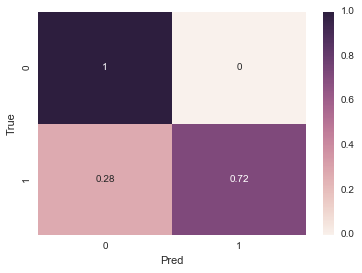

Confusion Matrix:
[[111   0]
 [  5  13]]


In [75]:
# Get confusion matrix on test set
y_pred = lm.predict(X_test)
cm = metrics.confusion_matrix(y_test['is_walk'], y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

ax = plt.axes()
sns.heatmap(cm_normalized, annot=True)
ax.set_ylabel('True')
ax.set_xlabel('Pred')
plt.show()

print "Confusion Matrix:"
print cm

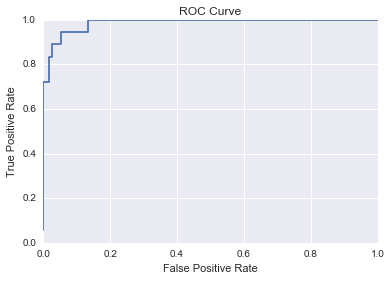

ROC AUC: 0.986


In [77]:
# Plot ROC curve and get AUC score
y_pred_proba = lm.predict_proba(X_test)[:,1]

# Determine the false positive and true positive rates
fpr, tpr, t = metrics.roc_curve(y_test['is_walk'], y_pred_proba)

 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

# Get ROC AUC score
print 'ROC AUC: %0.3f' % metrics.roc_auc_score(y_test['is_walk'], y_pred_proba)

Create a logistic regression model for 'is_brush_teeth' classifier and assess it's accuracy

In [78]:
# Instantiate logistic regression classifier using default params
lm = linear_model.LogisticRegression()

# Train logistic regression classifier on training set
lm.fit(X_train, y_train['is_brush_teeth'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [79]:
# Check model accuracy on test set
print "Accuracy: %0.3f" % lm.score(X_test, y_test['is_brush_teeth'])

Accuracy: 0.992


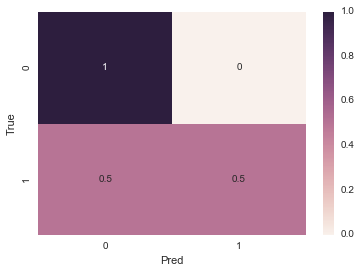

Confusion Matrix:
[[127   0]
 [  1   1]]


In [80]:
# Get confusion matrix on test set
y_pred = lm.predict(X_test)
cm = metrics.confusion_matrix(y_test['is_brush_teeth'], y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

ax = plt.axes()
sns.heatmap(cm_normalized, annot=True)
ax.set_ylabel('True')
ax.set_xlabel('Pred')
plt.show()

print "Confusion Matrix:"
print cm

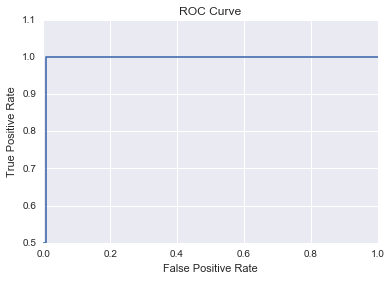

ROC AUC: 0.996


In [81]:
# Plot ROC curve and get AUC score
y_pred_proba = lm.predict_proba(X_test)[:,1]

# Determine the false positive and true positive rates
fpr, tpr, t = metrics.roc_curve(y_test['is_brush_teeth'], y_pred_proba)

 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

# Get ROC AUC score
print 'ROC AUC: %0.3f' % metrics.roc_auc_score(y_test['is_brush_teeth'], y_pred_proba)

Create a logistic regression model for 'is_getup_bed' classifier and assess it's accuracy

In [82]:
# Instantiate logistic regression classifier using default params
lm = linear_model.LogisticRegression()

# Train logistic regression classifier on training set
lm.fit(X_train, y_train['is_getup_bed'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [83]:
# Check model accuracy on test set
print "Accuracy: %0.3f" % lm.score(X_test, y_test['is_getup_bed'])

Accuracy: 0.860


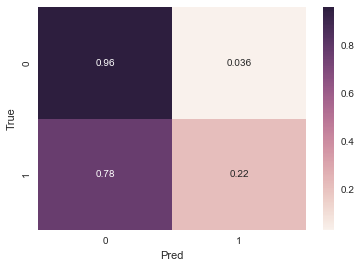

Confusion Matrix:
[[107   4]
 [ 14   4]]


In [84]:
# Get confusion matrix on test set
y_pred = lm.predict(X_test)
cm = metrics.confusion_matrix(y_test['is_getup_bed'], y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

ax = plt.axes()
sns.heatmap(cm_normalized, annot=True)
ax.set_ylabel('True')
ax.set_xlabel('Pred')
plt.show()

print "Confusion Matrix:"
print cm

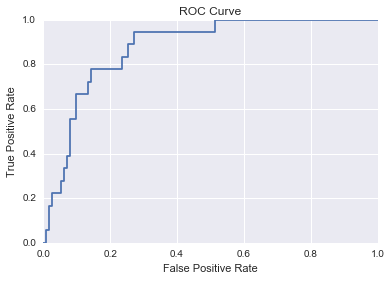

ROC AUC: 0.875


In [85]:
# Plot ROC curve and get AUC score
y_pred_proba = lm.predict_proba(X_test)[:,1]

# Determine the false positive and true positive rates
fpr, tpr, t = metrics.roc_curve(y_test['is_getup_bed'], y_pred_proba)

 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

# Get ROC AUC score
print 'ROC AUC: %0.3f' % metrics.roc_auc_score(y_test['is_getup_bed'], y_pred_proba)

Create a logistic regression model for 'is_use_telephone' classifier and assess it's accuracy

In [86]:
# Instantiate logistic regression classifier using default params
lm = linear_model.LogisticRegression()

# Train logistic regression classifier on training set
lm.fit(X_train, y_train['is_use_telephone'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [87]:
# Check model accuracy on test set
print "Accuracy: %0.3f" % lm.score(X_test, y_test['is_use_telephone'])

Accuracy: 0.984


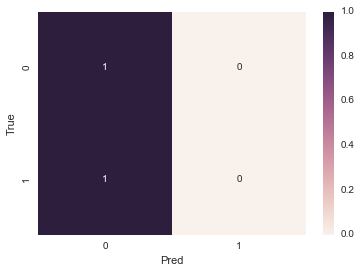

Confusion Matrix:
[[127   0]
 [  2   0]]


In [88]:
# Get confusion matrix on test set
y_pred = lm.predict(X_test)
cm = metrics.confusion_matrix(y_test['is_use_telephone'], y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

ax = plt.axes()
sns.heatmap(cm_normalized, annot=True)
ax.set_ylabel('True')
ax.set_xlabel('Pred')
plt.show()

print "Confusion Matrix:"
print cm

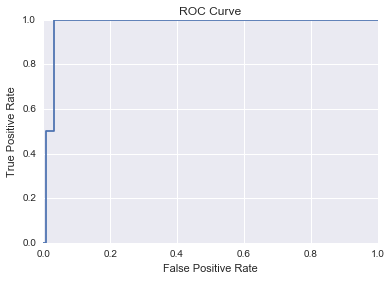

ROC AUC: 0.980


In [89]:
# Plot ROC curve and get AUC score
y_pred_proba = lm.predict_proba(X_test)[:,1]

# Determine the false positive and true positive rates
fpr, tpr, t = metrics.roc_curve(y_test['is_use_telephone'], y_pred_proba)

 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

# Get ROC AUC score
print 'ROC AUC: %0.3f' % metrics.roc_auc_score(y_test['is_use_telephone'], y_pred_proba)

Whilst initially looking only at accuracy, these results look extremely good (a little too good!), a review of the confusion matrix highlights a problem that was known with simply processing the entire dataset.  Namely, the percent of the dataset that is "True" for each model in most instances is small when compared to the total set size.  This can be most clearly seen when looking at the confusion matrix for 'is_use_telephone' where the "True" set was 1.8% of total set.  The logistics regression model therefore decided that it'll get the highest success rate if it just predicts that all values are False (would only be wrong 1.8% of time).  This obviously is not what is wanted so the training set will need to be balanced.  We'll do this by making the 'True' set 50% of the training set by randomly sampling the same amount of 'False' rows from the training set.  The model will then be built from this training data.  We don't need to do this with the test set.

In [156]:
def balanceData(df,activity):
    output = pd.DataFrame(columns=[df.columns])
    size = len(df[df[activity]==1])
    rem = len(df)-size
    ran_list = random.sample(xrange(0,rem),size)
    for num in range(0,rem):
        if num in ran_list:
            output = output.append(df.iloc[num])
    output = output.append(df[df[activity]==1])
    return output


In [ ]:
trainDF = balanceData(trainFeaturesDF,'is_walk')

In [158]:
# Set target variable name
target = []
for feature in trainDF.columns:
    if 'is_' in feature:
        target.append(feature)

# Set X and y
X_train = trainDF.drop(target, axis=1)
y_train = trainDF[target]
X_test = testFeaturesDF.drop(target, axis=1)
y_test = testFeaturesDF[target]

Create a new logistic regression model for 'is_walk' classifier and assess it's accuracy with a balanced training set

In [159]:
# Instantiate logistic regression classifier using default params
lm = linear_model.LogisticRegression()

# Train logistic regression classifier on training set
lm.fit(X_train, y_train['is_walk'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [160]:
# Check model accuracy on test set
print "Accuracy: %0.3f" % lm.score(X_test, y_test['is_walk'])

Accuracy: 0.930


We see that with the balanced set the accuracy has dropped a little from 0.961.  The result however is still quite good for such a simplistic set of features.

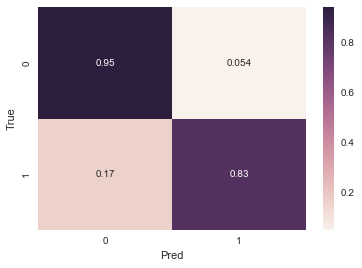

Confusion Matrix:
[[105   6]
 [  3  15]]


In [161]:
# Get confusion matrix on test set
y_pred = lm.predict(X_test)
cm = metrics.confusion_matrix(y_test['is_walk'], y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

ax = plt.axes()
sns.heatmap(cm_normalized, annot=True)
ax.set_ylabel('True')
ax.set_xlabel('Pred')
plt.show()

print "Confusion Matrix:"
print cm

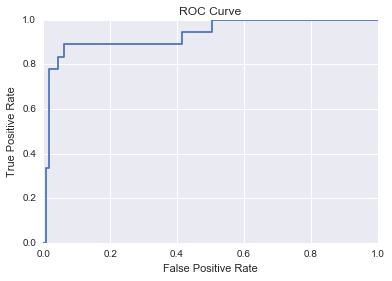

ROC AUC: 0.932


In [162]:
# Plot ROC curve and get AUC score
y_pred_proba = lm.predict_proba(X_test)[:,1]

# Determine the false positive and true positive rates
fpr, tpr, t = metrics.roc_curve(y_test['is_walk'], y_pred_proba)

 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

# Get ROC AUC score
print 'ROC AUC: %0.3f' % metrics.roc_auc_score(y_test['is_walk'], y_pred_proba)

In [163]:
trainDF = balanceData(trainFeaturesDF,'is_use_telephone')

In [164]:
# Set target variable name
target = []
for feature in trainDF.columns:
    if 'is_' in feature:
        target.append(feature)

# Set X and y
X_train = trainDF.drop(target, axis=1)
y_train = trainDF[target]
X_test = testFeaturesDF.drop(target, axis=1)
y_test = testFeaturesDF[target]

Create a logistic regression model for 'is_use_telephone' classifier and assess it's accuracy

In [165]:
# Instantiate logistic regression classifier using default params
lm = linear_model.LogisticRegression()

# Train logistic regression classifier on training set
lm.fit(X_train, y_train['is_use_telephone'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [166]:
# Check model accuracy on test set
print "Accuracy: %0.3f" % lm.score(X_test, y_test['is_use_telephone'])

Accuracy: 0.953


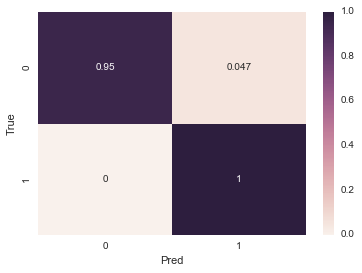

Confusion Matrix:
[[121   6]
 [  0   2]]


In [167]:
# Get confusion matrix on test set
y_pred = lm.predict(X_test)
cm = metrics.confusion_matrix(y_test['is_use_telephone'], y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

ax = plt.axes()
sns.heatmap(cm_normalized, annot=True)
ax.set_ylabel('True')
ax.set_xlabel('Pred')
plt.show()

print "Confusion Matrix:"
print cm

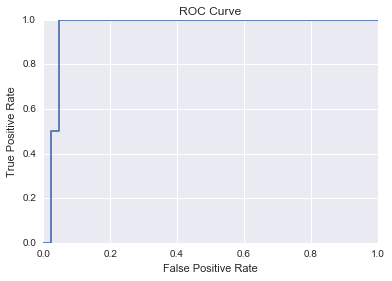

ROC AUC: 0.965


In [168]:
# Plot ROC curve and get AUC score
y_pred_proba = lm.predict_proba(X_test)[:,1]

# Determine the false positive and true positive rates
fpr, tpr, t = metrics.roc_curve(y_test['is_use_telephone'], y_pred_proba)

 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

# Get ROC AUC score
print 'ROC AUC: %0.3f' % metrics.roc_auc_score(y_test['is_use_telephone'], y_pred_proba)

Create a Random Forest model for 'is_walk'

In [191]:
# Set target variable name
target = []
for feature in trainDF.columns:
    if 'is_' in feature:
        target.append(feature)

# Set X and y
X_train = trainFeaturesDF.drop(target, axis=1)
y_train = trainFeaturesDF[target]
X_test = testFeaturesDF.drop(target, axis=1)
y_test = testFeaturesDF[target]

In [192]:
from sklearn import ensemble

# Instantiate model
rf = ensemble.RandomForestClassifier(n_estimators=20)

# Train model on training set
rf.fit(X_train, y_train['is_walk'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [193]:
# Evaluate model on train set
print "Accuracy: %0.3f" % rf.score(X_train, y_train['is_walk'])

# Evaluate model on test set
print "Accuracy: %0.3f" % rf.score(X_test, y_test['is_walk'])

Accuracy: 0.996
Accuracy: 0.969


Best Params:
{'n_estimators': 2}
Accuracy of current model: 0.977
Accuracy using best param: 0.934
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=3, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Accuracy of current model: 0.977
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Accuracy of updated model: 0.961


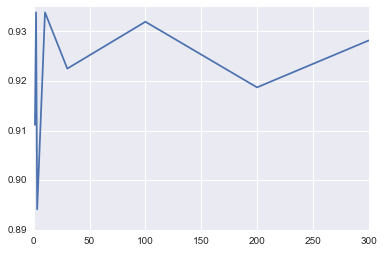

In [196]:
# Set list of values to grid search over
n = [1, 2, 3, 10, 20, 30, 100, 200, 300]
params = {'n_estimators': n}

# Perform grid search using list of values
gs = grid_search.GridSearchCV(
    estimator=ensemble.RandomForestClassifier(),
    param_grid=params)
gs.fit(X_train, y_train['is_walk'])

# Get best value to use
print "Best Params:"
print gs.best_params_

# Get improvement
print "Accuracy of current model: %0.3f" % rf.score(X_test, y_test['is_walk'])
print "Accuracy using best param: %0.3f" % gs.best_score_

# Plot scores
plt.plot(n, [s[1] for s in gs.grid_scores_])

# Current model params
print rf
print "Accuracy of current model: %0.3f" % rf.score(X_test, y_test['is_walk'])

# Update model params
rf.set_params(n_estimators=gs.best_params_['n_estimators'])

# Retrain model on new params
rf.fit(X_train, y_train['is_walk'])

# Updated model params
print rf
print "Accuracy of updated model: %0.3f" % rf.score(X_test, y_test['is_walk'])

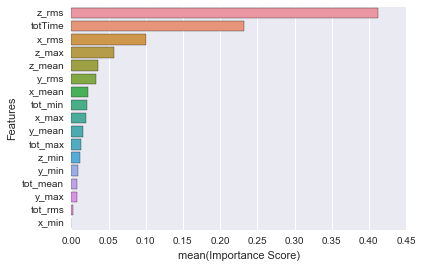

In [197]:
# Plot importances for all features
features = X_train.columns
feature_importances = rf.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

sns.barplot(y='Features', x='Importance Score', data=features_df)

In [180]:
trainDF = balanceData(trainFeaturesDF,'is_walk')

In [181]:
# Set target variable name
target = []
for feature in trainDF.columns:
    if 'is_' in feature:
        target.append(feature)

# Set X and y
X_train = trainDF.drop(target, axis=1)
y_train = trainDF[target]
X_test = testFeaturesDF.drop(target, axis=1)
y_test = testFeaturesDF[target]

In [182]:
from sklearn import ensemble

# Instantiate model
rf = ensemble.RandomForestClassifier(n_estimators=20)

# Train model on training set
rf.fit(X_train, y_train['is_walk'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [183]:
# Evaluate model on train set
print "Accuracy: %0.3f" % rf.score(X_train, y_train['is_walk'])

# Evaluate model on test set
print "Accuracy: %0.3f" % rf.score(X_test, y_test['is_walk'])

Accuracy: 1.000
Accuracy: 0.969


Best Params:
{'n_estimators': 10}
Accuracy of current model: 0.969
Accuracy using best param: 0.938
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Accuracy of current model: 0.969
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Accuracy of updated model: 0.969


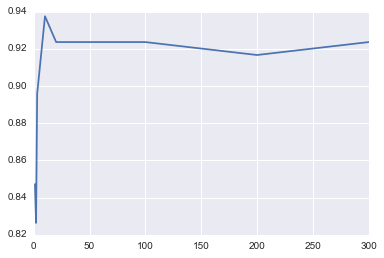

In [184]:
# Set list of values to grid search over
n = [1, 2, 3, 10, 20, 30, 100, 200, 300]
params = {'n_estimators': n}

# Perform grid search using list of values
gs = grid_search.GridSearchCV(
    estimator=ensemble.RandomForestClassifier(),
    param_grid=params)
gs.fit(X_train, y_train['is_walk'])

# Get best value to use
print "Best Params:"
print gs.best_params_

# Get improvement
print "Accuracy of current model: %0.3f" % rf.score(X_test, y_test['is_walk'])
print "Accuracy using best param: %0.3f" % gs.best_score_

# Plot scores
plt.plot(n, [s[1] for s in gs.grid_scores_])

# Current model params
print rf
print "Accuracy of current model: %0.3f" % rf.score(X_test, y_test['is_walk'])

# Update model params
rf.set_params(n_estimators=gs.best_params_['n_estimators'])

# Retrain model on new params
rf.fit(X_train, y_train['is_walk'])

# Updated model params
print rf
print "Accuracy of updated model: %0.3f" % rf.score(X_test, y_test['is_walk'])

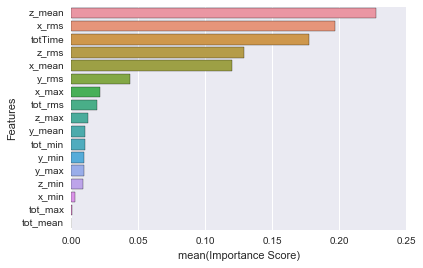

In [185]:
# Plot importances for all features
features = X_train.columns
feature_importances = rf.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

sns.barplot(y='Features', x='Importance Score', data=features_df)

Now re-run the Random Forest classified using the balanced class weight option

In [198]:
# Set target variable name
target = []
for feature in trainDF.columns:
    if 'is_' in feature:
        target.append(feature)

# Set X and y
X_train = trainFeaturesDF.drop(target, axis=1)
y_train = trainFeaturesDF[target]
X_test = testFeaturesDF.drop(target, axis=1)
y_test = testFeaturesDF[target]

In [199]:
from sklearn import ensemble

# Instantiate model
rf = ensemble.RandomForestClassifier(n_estimators=20,class_weight='balanced')

# Train model on training set
rf.fit(X_train, y_train['is_walk'])

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [200]:
# Evaluate model on train set
print "Accuracy: %0.3f" % rf.score(X_train, y_train['is_walk'])

# Evaluate model on test set
print "Accuracy: %0.3f" % rf.score(X_test, y_test['is_walk'])

Accuracy: 1.000
Accuracy: 0.977


Best Params:
{'n_estimators': 20}
Accuracy of current model: 0.977
Accuracy using best param: 0.941
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Accuracy of current model: 0.977
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Accuracy of updated model: 0.969


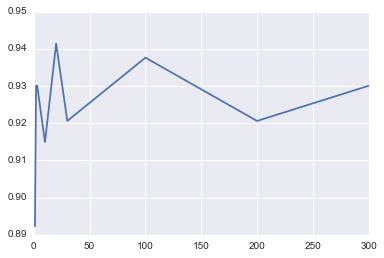

In [201]:
# Set list of values to grid search over
n = [1, 2, 3, 10, 20, 30, 100, 200, 300]
params = {'n_estimators': n}

# Perform grid search using list of values
gs = grid_search.GridSearchCV(
    estimator=ensemble.RandomForestClassifier(),
    param_grid=params)
gs.fit(X_train, y_train['is_walk'])

# Get best value to use
print "Best Params:"
print gs.best_params_

# Get improvement
print "Accuracy of current model: %0.3f" % rf.score(X_test, y_test['is_walk'])
print "Accuracy using best param: %0.3f" % gs.best_score_

# Plot scores
plt.plot(n, [s[1] for s in gs.grid_scores_])

# Current model params
print rf
print "Accuracy of current model: %0.3f" % rf.score(X_test, y_test['is_walk'])

# Update model params
rf.set_params(n_estimators=gs.best_params_['n_estimators'])

# Retrain model on new params
rf.fit(X_train, y_train['is_walk'])

# Updated model params
print rf
print "Accuracy of updated model: %0.3f" % rf.score(X_test, y_test['is_walk'])

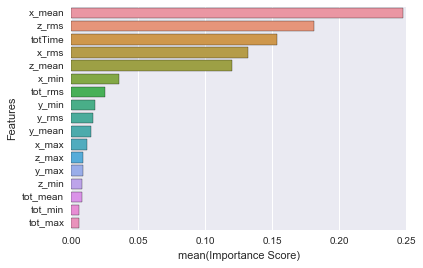

In [202]:
# Plot importances for all features
features = X_train.columns
feature_importances = rf.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

sns.barplot(y='Features', x='Importance Score', data=features_df)

Run a Random Forest Classifier using the balanced class_weight for the 'is_use_telephone'

In [203]:
# Set target variable name
target = []
for feature in trainDF.columns:
    if 'is_' in feature:
        target.append(feature)

# Set X and y
X_train = trainFeaturesDF.drop(target, axis=1)
y_train = trainFeaturesDF[target]
X_test = testFeaturesDF.drop(target, axis=1)
y_test = testFeaturesDF[target]

In [204]:
from sklearn import ensemble

# Instantiate model
rf = ensemble.RandomForestClassifier(n_estimators=20,class_weight='balanced')

# Train model on training set
rf.fit(X_train, y_train['is_use_telephone'])

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [206]:
# Evaluate model on train set
print "Accuracy: %0.3f" % rf.score(X_train, y_train['is_use_telephone'])

# Evaluate model on test set
print "Accuracy: %0.3f" % rf.score(X_test, y_test['is_use_telephone'])

Accuracy: 1.000
Accuracy: 0.984


Best Params:
{'n_estimators': 30}
Accuracy of current model: 0.984
Accuracy using best param: 0.992
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Accuracy of current model: 0.984
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Accuracy of updated model: 0.984


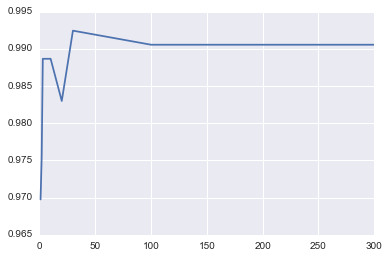

In [207]:
# Set list of values to grid search over
n = [1, 2, 3, 10, 20, 30, 100, 200, 300]
params = {'n_estimators': n}

# Perform grid search using list of values
gs = grid_search.GridSearchCV(
    estimator=ensemble.RandomForestClassifier(),
    param_grid=params)
gs.fit(X_train, y_train['is_use_telephone'])

# Get best value to use
print "Best Params:"
print gs.best_params_

# Get improvement
print "Accuracy of current model: %0.3f" % rf.score(X_test, y_test['is_use_telephone'])
print "Accuracy using best param: %0.3f" % gs.best_score_

# Plot scores
plt.plot(n, [s[1] for s in gs.grid_scores_])

# Current model params
print rf
print "Accuracy of current model: %0.3f" % rf.score(X_test, y_test['is_use_telephone'])

# Update model params
rf.set_params(n_estimators=gs.best_params_['n_estimators'])

# Retrain model on new params
rf.fit(X_train, y_train['is_use_telephone'])

# Updated model params
print rf
print "Accuracy of updated model: %0.3f" % rf.score(X_test, y_test['is_use_telephone'])

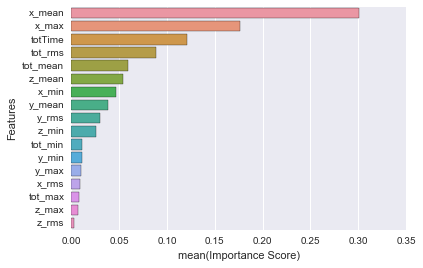

In [208]:
# Plot importances for all features
features = X_train.columns
feature_importances = rf.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

sns.barplot(y='Features', x='Importance Score', data=features_df)

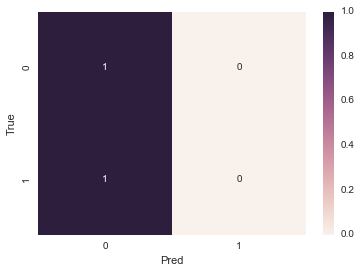

Confusion Matrix:
[[127   0]
 [  2   0]]


In [209]:
# Get confusion matrix on test set
y_pred = rf.predict(X_test)
cm = metrics.confusion_matrix(y_test['is_use_telephone'], y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

ax = plt.axes()
sns.heatmap(cm_normalized, annot=True)
ax.set_ylabel('True')
ax.set_xlabel('Pred')
plt.show()

print "Confusion Matrix:"
print cm

Create a multi-label classifier using OneVsRest classified and Random Forest

In [294]:
trainDF = createFeatures(trainList)
testDF = createFeatures(testList)

In [295]:
# The features dataframe has been initialised as all objects whereas all
# columns other than activity should be float.  Convert to correct data type
# so can create plots in exploratory analysis
col_names = testDF.columns
col_names = col_names[0:(len(col_names)-1)]  # drop activity from col_names
trainDF[col_names] = trainDF[col_names].astype(float)
trainDF.activity = trainDF.activity.astype(str)
testDF[col_names] = testDF[col_names].astype(float)
testDF.activity = testDF.activity.astype(str)

In [296]:
def flattenActivity(df_train,df_test):
    labels = df_train['activity'].unique()
    label_to_number = {label: i for i, label in enumerate(set(labels), 1)}
    lst = [(label_to_number[label], label) for label in labels]
    activity_dict = {}
    for num, activity in lst:
        activity_dict[activity] = num
    for row in range(0,len(df_train)):
        df_train['activity'].iloc[row] = activity_dict[df_train['activity'].iloc[row]]
    for row in range(0,len(df_test)):
        df_test['activity'].iloc[row] = activity_dict[df_test['activity'].iloc[row]]
    return df_train, df_test,activity_dict

trainDF,testDF,activity_dict = flattenActivity(trainDF,testDF)

In [249]:
trainDF.head()

,x_max,y_max,z_max,tot_max,x_min,y_min,z_min,tot_min,x_mean,y_mean,z_mean,tot_mean,x_rms,y_rms,z_rms,tot_rms,totTime,activity
0,0.023810,0.690476,1.023810,1.125614,-0.976190,0.166667,0.166667,0.817537,-0.698129,0.343254,0.448980,0.995518,0.767131,0.353572,0.529754,0.997067,5.25000,1
1,0.214286,0.452381,1.119048,1.201615,-1.023810,-0.071429,0.166667,0.828558,-0.580683,0.156383,0.525471,0.991714,0.743748,0.224283,0.618927,0.993245,9.40625,1
2,0.166667,0.547619,1.071429,1.197834,-1.166667,-0.214286,0.023810,0.713889,-0.626582,0.246986,0.439873,0.994375,0.762173,0.272881,0.579552,0.995617,9.87500,1
3,-0.023810,0.261905,1.071429,1.171032,-1.119048,-0.404762,-0.357143,0.691297,-0.739796,0.117914,0.358560,0.989655,0.808055,0.182884,0.546410,0.992453,5.25000,1
4,-0.023810,0.452381,1.071429,1.273086,-1.119048,-0.452381,-0.547619,0.825816,-0.524650,0.158543,0.496779,0.993439,0.661126,0.193929,0.717709,0.994888,10.62500,1


In [259]:
testDF.head()

,x_max,y_max,z_max,tot_max,x_min,y_min,z_min,tot_min,x_mean,y_mean,z_mean,tot_mean,x_rms,y_rms,z_rms,tot_rms,totTime,activity
0,0.214286,1.071429,1.023810,1.236950,-1.166667,-0.071429,-0.119048,0.768941,-0.402958,0.372535,0.509500,1.009512,0.640474,0.430777,0.653923,1.011628,12.37500,1
1,0.119048,0.642857,1.119048,1.512420,-1.452381,-0.976190,-0.785714,0.704295,-0.662826,0.013057,0.272219,0.986880,0.775851,0.240871,0.569122,0.991899,6.78125,1
2,0.500000,0.833333,1.261905,1.545053,-1.500000,-0.309524,-0.785714,0.318550,-0.658730,0.345805,0.295918,1.001881,0.777355,0.407222,0.519904,1.020006,5.25000,1
3,0.595238,1.166667,1.119048,1.545053,-1.166667,-0.357143,-0.071429,0.643738,-0.500664,0.490476,0.427575,1.016040,0.659443,0.539587,0.566886,1.023415,6.71875,1
4,0.071429,0.595238,1.119048,1.651461,-1.500000,-0.500000,-0.690476,0.647251,-0.737037,0.209259,0.310847,0.998700,0.825847,0.267238,0.508073,1.005772,5.62500,1


In [304]:
# Set target variable name
target = ['activity']

# Set X and y
X_train = trainDF.drop(target, axis=1)
y_train = np.array(trainDF[target].astype(float))
X_test = testDF.drop(target, axis=1)
y_test = np.array(testDF[target].astype(float))

In [305]:
from sklearn.multiclass import OneVsRestClassifier
clf = OneVsRestClassifier(ensemble.RandomForestClassifier(n_estimators=20,class_weight='balanced')).fit(X_train, y_train)

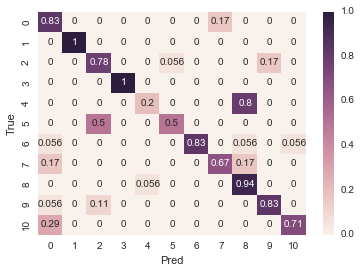

value: 1 , activity: standup_chair
value: 2 , activity: comb_hair
value: 3 , activity: drink_glass
value: 4 , activity: brush_teeth
value: 5 , activity: liedown_bed
value: 6 , activity: use_telephone
value: 7 , activity: walk
value: 8 , activity: sitdown_chair
value: 9 , activity: getup_bed
value: 10 , activity: pour_water
value: 11 , activity: descend_stairs


In [306]:
# Get confusion matrix on test set
y_pred = clf.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

ax = plt.axes()
sns.heatmap(cm_normalized, annot=True)
ax.set_ylabel('True')
ax.set_xlabel('Pred')
plt.show()

for key in activity_dict:
    print "value: %s , activity: %s" % (activity_dict[key], key)
       

In [ ]:
activity_dict

In [ ]:
activity_dict

In [ ]:
df